@author: yinlei

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### This part is about annual sales made in California W.R.T zero-emission vehicles (including electric, plug-in hybrid and hydrogen) 

In [136]:
dfs = pd.read_excel(r'/Users/leiyin/Desktop/New_ZEV_Sales_Last_updated_01-18-2023.xlsx', 'County')
dfs= dfs[~(dfs['FUEL_TYPE'] =='Hydrogen')]

In [137]:
dfs_newsale_amount_over_time = dfs.groupby('Data Year').sum()
print(dfs_newsale_amount_over_time)

           Number of Vehicles
Data Year                    
1998                        5
1999                        1
2000                        2
2001                        1
2002                        3
2003                        6
2004                        1
2005                        8
2006                        1
2009                       83
2010                      648
2011                     6736
2012                    17833
2013                    39798
2014                    58608
2015                    64035
2016                    71723
2017                    91464
2018                   154747
2019                   145263
2020                   144099
2021                   247074
2022                   343244


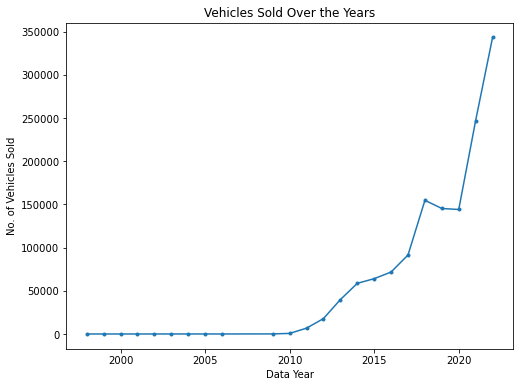

In [138]:
plt.figure(figsize=(8, 6))
plt.plot(dfs_newsale_amount_over_time.index, dfs_newsale_amount_over_time["Number of Vehicles"], marker = '.')
plt.xlabel('Data Year')
plt.ylabel('No. of Vehicles Sold')
plt.title('Vehicles Sold Over the Years')
plt.show()

#### The growth is almost exponential, with a slight decrease in 18-19 ( apparently due to COVID) 

### Total Sales made in different counties of LA 

In [139]:
dfs_amount_over_places = dfs.groupby(by = 'County')['Number of Vehicles'].sum()
dfs_amount_over_places = dfs_amount_over_places.sort_values()
print(dfs_amount_over_places)

County
Modoc                   6
Sierra                 11
Alpine                 31
Lassen                 39
Trinity                50
Colusa                 75
Del Norte              95
Plumas                103
Glenn                 118
Mono                  138
Mariposa              153
Inyo                  155
Siskiyou              181
Tehama                254
Amador                342
Tuolumne              426
Calaveras             474
Lake                  485
Yuba                  582
Imperial              771
Kings                 825
Sutter                840
Madera               1166
Mendocino            1215
San Benito           1389
Shasta               1421
Humboldt             1562
Butte                1670
Merced               1756
Nevada               1800
Tulare               2684
Napa                 4668
Stanislaus           5122
El Dorado            5201
Yolo                 5240
Monterey             6531
San Luis Obispo      6581
Kern                 7345
Santa

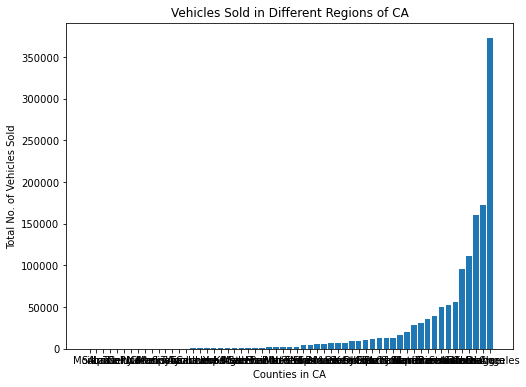

In [140]:
plt.figure(figsize=(8, 6))
plt.bar(dfs_amount_over_places.index, dfs_amount_over_places)
plt.xlabel('Counties in CA')
plt.ylabel('Total No. of Vehicles Sold')
plt.title('Vehicles Sold in Different Regions of CA')
plt.show()

### Recent Trend of Preferences between Electric and Plug-in Hybrid ( since 2010) 

In [141]:
dfs_recent = dfs[dfs['Data Year'] > 2009]
dfs_recent_group = dfs_recent.groupby('FUEL_TYPE')
dfs_recent_sum = {}
for kind in ['Electric', 'PHEV']:
    dfs_recent_sum[kind] = dfs_recent_group.get_group(kind).groupby(by="Data Year")["Number of Vehicles"].sum()

In [142]:
print(dfs_recent_sum['PHEV'])

Data Year
2010      166
2011     1657
2012    12678
2013    18631
2014    29088
2015    25666
2016    34094
2017    45492
2018    59699
2019    50660
2020    38153
2021    63141
2022    50748
Name: Number of Vehicles, dtype: int64


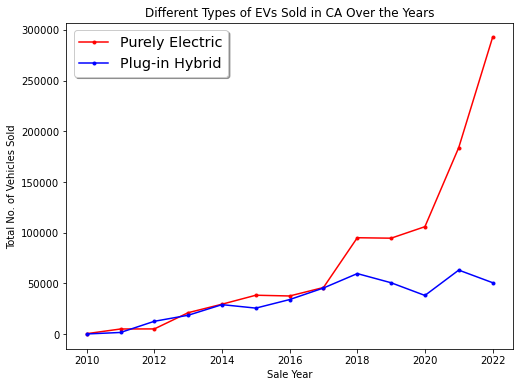

In [146]:
plt.figure(figsize=(8, 6))
plt.plot(dfs_recent_sum['Electric'].index, dfs_recent_sum['Electric'], 'r-', dfs_recent_sum['Electric'].index, dfs_recent_sum['PHEV'], 'b-', marker = '.')
plt.xlabel('Sale Year')
plt.ylabel('Total No. of Vehicles Sold')
plt.title('Different Types of EVs Sold in CA Over the Years')
plt.legend(loc='upper left', shadow=True, fontsize='x-large', labels = ['Purely Electric', "Plug-in Hybrid"])
plt.show()

In [147]:
dfs_recent_brand = dfs_recent.groupby(by = 'MAKE')['Number of Vehicles'].sum()
dfs_recent_brand = dfs_recent_brand.sort_values()
print(dfs_recent_brand)

MAKE
McLaren              27
Bentley              73
Scion                92
GMC                 111
Karma               118
Ferrari             131
Fisker              371
Toyota/Subaru       440
Mazda               458
Lucid               667
Cadillac            699
Genesis             921
Land Rover          927
Lincoln            1122
Lexus              1909
Jaguar             1996
Mitsubishi         3309
MINI               3330
Rivian             4439
Polestar           4546
Subaru             4802
Smart              5059
Porsche            9849
Jeep              11836
Chrysler          13396
Mercedes-Benz     14095
Volvo             19574
Audi              22423
Volkswagen        25770
Kia               26012
Honda             26685
Hyundai           28977
FIAT              29815
Nissan            61292
Ford              71625
BMW               92043
Toyota           109613
Chevrolet        151427
Tesla            635293
Name: Number of Vehicles, dtype: int64


In [150]:
dfs_recent_brand['The rest'] = 0
print(dfs_recent_brand)

MAKE
McLaren              27
Bentley              73
Scion                92
GMC                 111
Karma               118
Ferrari             131
Fisker              371
Toyota/Subaru       440
Mazda               458
Lucid               667
Cadillac            699
Genesis             921
Land Rover          927
Lincoln            1122
Lexus              1909
Jaguar             1996
Mitsubishi         3309
MINI               3330
Rivian             4439
Polestar           4546
Subaru             4802
Smart              5059
Porsche            9849
Jeep              11836
Chrysler          13396
Mercedes-Benz     14095
Volvo             19574
Audi              22423
Volkswagen        25770
Kia               26012
Honda             26685
Hyundai           28977
FIAT              29815
Nissan            61292
Ford              71625
BMW               92043
Toyota           109613
Chevrolet        151427
Tesla            635293
The rest              0
Name: Number of Vehicles, dtype: in

In [151]:
dfs_recent_brand_mono = dfs_recent_brand
for brand in ['Audi', 'BMW', 'Bentley', 'Cadillac', 'Chevrolet', 'Chrysler', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Lucid', 'MINI', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Polestar', 'Porsche', 'Rivian', 'Scion', 'Smart', 'Subaru', 'Tesla', 'Toyota', 'Toyota/Subaru', 'Volkswagen', 'Volvo']:
    if dfs_recent_brand_mono[brand] < dfs_recent_brand_mono['Honda']:
        dfs_recent_brand_mono['The rest'] += dfs_recent_brand_mono[brand]
        del dfs_recent_brand_mono[brand]

In [152]:
print(dfs_recent_brand_mono)
print(dfs_recent_brand_mono.keys())

MAKE
Honda         26685
Hyundai       28977
FIAT          29815
Nissan        61292
Ford          71625
BMW           92043
Toyota       109613
Chevrolet    151427
Tesla        635293
The rest     178502
Name: Number of Vehicles, dtype: int64
Index(['Honda', 'Hyundai', 'FIAT', 'Nissan', 'Ford', 'BMW', 'Toyota',
       'Chevrolet', 'Tesla', 'The rest'],
      dtype='object', name='MAKE')


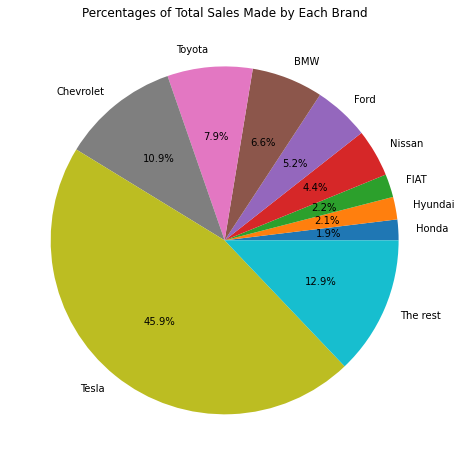

In [153]:
plt.figure(figsize=(10, 8))
plt.pie(dfs_recent_brand_mono, labels = dfs_recent_brand_mono.keys(), autopct='%1.1f%%')
plt.title('Percentages of Total Sales Made by Each Brand')
plt.show() 

### (I can also make a pie chart with respect to which country the brand is from, if necessary)

### The following Data Processing and Plots are based on vehicles population instead of vehicle sales 

In [154]:
dfp = pd.read_excel(r'/Users/leiyin/Downloads/Vehicle_Population_Last_updated_04-29-2022.xlsx', 'County')

In [155]:
dfp_most_recent = dfp.groupby(by = 'Data Year')

In [156]:
dfp_most_recent.groups.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [157]:
dfp_2021 = dfp_most_recent.get_group(2021)
print(dfp_2021)

       Data Year   County Fuel Type    Make                 Model  \
17800       2021  Alameda    Diesel     NaN                   NaN   
17801       2021  Alameda  Electric    Audi                e-tron   
17802       2021  Alameda  Electric    Audi             E-Tron Gt   
17803       2021  Alameda  Electric    Audi      E-Tron Sportback   
17804       2021  Alameda  Electric    Audi          Rs E-Tron Gt   
...          ...      ...       ...     ...                   ...   
21882       2021     Yuba      PHEV  Subaru             Crosstrek   
21883       2021     Yuba      PHEV  Toyota  Prius Plug-in Hybrid   
21884       2021     Yuba      PHEV  Toyota           Prius Prime   
21885       2021     Yuba      PHEV  Toyota            RAV4 Prime   
21886       2021     Yuba      PHEV   Volvo                  XC90   

       Number of Vehicles  
17800               13799  
17801                 281  
17802                   6  
17803                   5  
17804                   4  
...

In [158]:
dfp_cur_ft = dfp_2021.groupby(by = 'Fuel Type')['Number of Vehicles'].sum()
print(dfp_cur_ft)

Fuel Type
Diesel               590216
Electric             522445
Flex Fuel           1208970
Gasoline           25998618
Gasoline Hybrid     1298275
Hydrogen              10127
Natural Gas            8461
PHEV                 305315
Propane                  90
Name: Number of Vehicles, dtype: int64


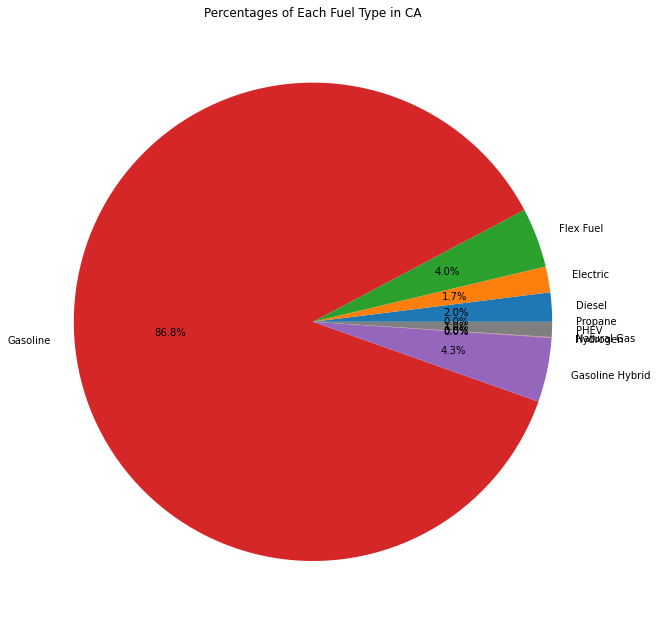

In [159]:
plt.figure(figsize=(11, 11))
plt.pie(dfp_cur_ft, labels = dfp_cur_ft.keys(), autopct='%1.1f%%')
plt.title('Percentages of Each Fuel Type in CA')
plt.show() 